In [2]:
## File to read in LRG catalog & matched Randoms sampe & to read out the clustering input files (ra,dec,z,cdist)
from __future__ import division
import numpy as np
import math
from astropy import units as u
from astropy.coordinates import SkyCoord, match_coordinates_sky
import astropy.coordinates as coord
from astropy.cosmology import FlatLambdaCDM
from astropy.table import Table
from astropy.io import fits
import time
from numpy.lib.recfunctions import append_fields
#from kde import weighted_gaussian_kde
from astropy.cosmology import FlatLambdaCDM,Planck15
import sys
from time import gmtime, strftime

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

In [3]:
# Read in cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
print(cosmo.h)

0.7


In [4]:
## Running LRGs w/ bins to match peas Oct 2017
#import clustering.projected_correlation_functions as w
#import clustering.randoms as rand
#from clustering.utils import wp_d1d2,wp_dd

from clustering.clustering import projected_correlation_functions as w

from clustering.clustering import randoms as rand
from clustering.clustering.utils import wp_d1d2,wp_dd

In [4]:
LRG= Table.read('../codes/MainCatalogues/LRG/LRGzcat.fits')
LRGr=Table.read('../codes/MainCatalogues/LRG/LRGRandzcat.fits')


In [6]:
# 10/09/2017, running to match cross correlation functions
pimax=60
#bins = np.array([1,3,6,8,10,15,20,30,40,50,60])
# 10/13/2017, running to match cross correlation functions
#bins = np.array([1,4,8,16,32,40,50,60,100])
bins = np.array([.1,.5,1,3,6,8,10,15,20,30,40,50,60,80,100])

print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
#rp,wp_p,wp_p_err_boot,cov_boot,wp_arr_boot = w.auto_wp(LRG, LRGr, bins, pimax, m=100,estimator='P',errtype='b')
#rp,wp_p,wp_p_err_jack,cov_jack = w.auto_wp(LRG, LRGr, bins, pimax, m=100,estimator='L')
rp,wp_p,wp_p_err_jack,cov_jack = w.auto_wp(LRG, LRGr, bins, pimax, m=5,estimator='L')
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

2020-11-08 19:36:53


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.042 sec
Using AVX512 kernel
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.430 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.046 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 794. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.050 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   1.664 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 49.604 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   1.35

Using  25  jacknife samples
1 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.039 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.429 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.033 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 794. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.047 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   1.026 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 49.219 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.913 sec
countpairs_moc

2 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.353 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.031 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 794. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.044 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   1.007 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 48.854 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.888 sec
countpairs_moc

3 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.179 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 701. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.045 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.908 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 42.428 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.808 sec
countpairs_moc

4 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.272 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.032 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 752. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.045 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.974 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 45.545 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.849 sec
countpairs_moc

5 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.339 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.032 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 794. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.045 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   1.012 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 49.073 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.901 sec
countpairs_moc

6 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.038 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.369 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.031 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 794. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.046 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   1.012 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 48.916 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.917 sec
countpairs_moc

7 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.039 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.358 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.031 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 794. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.046 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   1.025 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 48.778 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.902 sec
countpairs_moc

8 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.291 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.030 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 761. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.043 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.978 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 46.778 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.871 sec
countpairs_moc

9 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.241 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.031 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 742. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.045 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.927 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 45.482 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.843 sec
countpairs_moc

10 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.034 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.378 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.031 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 785. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.045 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.995 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 48.290 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.865 sec
countpairs_moc

11 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.038 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.350 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.031 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 794. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.045 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   1.022 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 48.824 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.909 sec
countpairs_moc

12 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.039 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.403 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.030 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 794. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.044 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.982 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 48.851 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.906 sec
countpairs_moc

13 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 32,30,9.  Time taken =   0.034 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.139 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.034 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 687. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 49,45,9.  Time taken =   0.043 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 49,45,9.  Time taken =   0.882 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 41.006 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.776 sec
countpairs_moc

14 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.031 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.999 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.026 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 630. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.039 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.800 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 35.466 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.723 sec
countpairs_moc

15 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.033 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.255 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.031 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 754. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.043 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.958 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 45.588 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.852 sec
countpairs_moc

16 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.039 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.380 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.031 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 794. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.045 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   1.008 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 49.036 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.897 sec
countpairs_moc

17 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.038 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.372 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.031 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 794. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.044 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   1.012 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 49.691 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.901 sec
countpairs_moc

18 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.273 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.030 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 747. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.043 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.972 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 45.747 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.863 sec
countpairs_moc

19 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.034 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.203 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.030 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 709. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.045 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.916 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 43.373 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.805 sec
countpairs_moc

20 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.344 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.031 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 782. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.044 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.997 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 47.953 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.886 sec
countpairs_moc

21 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.038 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.347 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.032 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 794. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.047 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   1.020 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 49.123 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.897 sec
countpairs_moc

22 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.039 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.371 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.032 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 794. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.045 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   1.028 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 48.908 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.920 sec
countpairs_moc

23 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.205 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.034 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 719. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.043 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.928 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 43.868 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.857 sec
countpairs_moc

24 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.270 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.030 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 756. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.046 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.972 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 46.289 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.850 sec
countpairs_moc

25 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.034 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.348 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.031 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 794. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.047 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   1.022 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 48.941 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.883 sec
countpairs_moc

2020-11-09 00:11:28


100% done. Time taken =     9 mins   17 secs


In [7]:
np.save('output/ACFResults/LandySzalay/rp_LRGJackpi60.npy', rp)
np.save('output/ACFResults/LandySzalay/wp_LRGJackpi60.npy', wp_p)
np.save('output/ACFResults/LandySzalay/wp_err_LRGJackpi60.npy', wp_p_err_jack)
np.save('output/ACFResults/LandySzalay/cov_LRGJackpi60.npy', cov_jack)

In [5]:
# 10/09/2017, running to match cross correlation functions
pimax=60
#bins = np.array([1,3,6,8,10,15,20,30,40,50,60])
# 10/13/2017, running to match cross correlation functions
#bins = np.array([1,4,8,16,32,40,50,60,100])
bins = np.array([.1,.5,1,3,6,8,10,15,20,30,40,50,60,80,100])

print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
#rp,wp_p,wp_p_err_boot,cov_boot,wp_arr_boot = w.auto_wp(LRG, LRGr, bins, pimax, m=100,estimator='P',errtype='b')
#rp,wp_p,wp_p_err_jack,cov_jack = w.auto_wp(LRG, LRGr, bins, pimax, m=100,estimator='L')
rp,wp_p,wp_p_err_jack,cov_jack = w.auto_wp(LRG, LRGr, bins, pimax, m=5,estimator='P')

np.save('output/ACFResults/Peebles/rp_LRGJackpi60.npy', rp)
np.save('output/ACFResults/Peebles/wp_LRGJackpi60.npy', wp_p)
np.save('output/ACFResults/Peebles/wp_err_LRGJackpi60.npy', wp_p_err_jack)
np.save('output/ACFResults/Peebles/cov_LRGJackpi60.npy', cov_jack)

print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

2020-11-09 16:58:03


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.042 sec
Using AVX512 kernel
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.444 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.043 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 794. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.071 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   1.824 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 50.491 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   1.33

Using  25  jacknife samples
1 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.038 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.368 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.031 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 794. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.045 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   1.020 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 49.668 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.912 sec
countpairs_moc

2 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.368 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.031 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 794. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.044 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   1.056 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 48.915 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.895 sec
countpairs_moc

3 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.173 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 701. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.045 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.909 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 42.243 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.803 sec
countpairs_moc

4 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.275 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 752. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.048 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.980 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 46.034 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.862 sec
countpairs_moc

5 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.034 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.352 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.031 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 794. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.045 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   1.014 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 49.209 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.884 sec
countpairs_moc

6 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.038 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.380 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.031 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 794. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.046 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.997 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 48.937 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.916 sec
countpairs_moc

7 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.038 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.338 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.031 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 794. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.044 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   1.018 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 48.739 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.915 sec
countpairs_moc

8 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.038 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.370 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.031 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 761. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.045 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   1.000 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 46.934 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.884 sec
countpairs_moc

9 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.271 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.029 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 742. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.042 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.944 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 45.366 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.843 sec
countpairs_moc

10 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.034 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.341 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.031 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 785. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.046 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.982 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 48.745 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.882 sec
countpairs_moc

11 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.039 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.412 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.031 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 794. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.045 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   1.018 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 48.978 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.924 sec
countpairs_moc

12 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.038 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.351 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.030 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 794. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.045 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   1.011 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 49.253 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.900 sec
countpairs_moc

13 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 32,30,9.  Time taken =   0.034 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.146 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 687. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 49,45,9.  Time taken =   0.043 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 49,45,9.  Time taken =   0.854 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 41.000 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.785 sec
countpairs_moc

14 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.031 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.991 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.026 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 630. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.038 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.794 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 35.442 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.689 sec
countpairs_moc

15 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.033 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.274 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.030 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 754. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.042 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.952 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 45.506 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.866 sec
countpairs_moc

16 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.039 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.355 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.030 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 794. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.045 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   1.003 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 48.621 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.886 sec
countpairs_moc

17 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.385 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 794. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.044 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   1.001 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 49.036 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.897 sec
countpairs_moc

18 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.306 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.030 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 747. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.043 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.948 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 46.078 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.841 sec
countpairs_moc

19 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.034 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.206 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.033 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 709. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.043 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.916 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 43.240 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.822 sec
countpairs_moc

20 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.033 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.343 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.030 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 782. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.043 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.988 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 47.982 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.874 sec
countpairs_moc

21 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.356 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.031 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 794. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.044 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.986 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 48.912 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.866 sec
countpairs_moc

22 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.373 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.031 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 794. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.047 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.991 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 49.372 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.869 sec
countpairs_moc

23 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.243 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.034 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 719. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.045 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.915 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 43.652 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.797 sec
countpairs_moc

24 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.298 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.029 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 756. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.042 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.955 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 46.337 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.835 sec
countpairs_moc

25 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.359 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.038 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (33, 30, 9); avg_np = 794. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   0.045 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 50,45,9.  Time taken =   1.000 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 48.816 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 33,30,9.  Time taken =   0.913 sec
countpairs_moc

2020-11-09 21:32:55


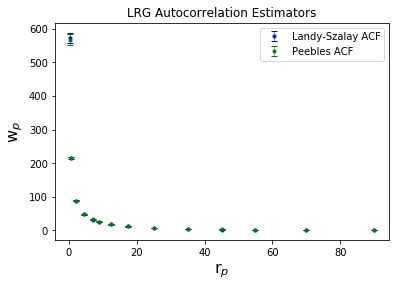

In [22]:
rp_xc_Pjackpi10 = np.load('output/ACFResults/Peebles/rp_LRGJackpi60.npy')
wp_xc_Pjackpi10 = np.load('output/ACFResults/Peebles/wp_LRGJackpi60.npy')
wp_xc_err_Pjackpi10 = np.load('output/ACFResults/Peebles/wp_err_LRGJackpi60.npy')
cov_xc_Pjackpi10 = np.load('output/ACFResults/Peebles/cov_LRGJackpi60.npy')

rp_xc_Pjackpi10LS = np.load('output/ACFResults/LandySzalay/rp_LRGJackpi60.npy')
wp_xc_Pjackpi10LS = np.load('output/ACFResults/LandySzalay/wp_LRGJackpi60.npy')
wp_xc_err_Pjackpi10LS = np.load('output/ACFResults/LandySzalay/wp_err_LRGJackpi60.npy')
cov_xc_Pjackpi10LS = np.load('output/ACFResults/LandySzalay/cov_LRGJackpi60.npy')

#plt.yscale("log")
#plt.xscale("log")
plt.errorbar(rp_xc_Pjackpi10LS,wp_xc_Pjackpi10LS,yerr=wp_xc_err_Pjackpi10LS,fmt='.',color='b', capsize = 3, elinewidth = 0.5, label='Landy-Szalay ACF')
plt.errorbar(rp_xc_Pjackpi10,wp_xc_Pjackpi10,yerr=wp_xc_err_Pjackpi10,fmt='.',color='g', capsize = 3, elinewidth = 0.5, label='Peebles ACF')
#plt.errorbar(rp_LRGjack,wp_p_LRGjack/rp_LRGjack,yerr=wp_p_err_LRGjack,fmt='d',color='m', capsize = 3, elinewidth = 0.5,label='LRG ACF')
##plt.errorbar(rp_LRGboot,wp_p_LRGboot,yerr=wp_p_err_LRGboot,fmt='.',color='r',label='LRG ACF Boostrap')
plt.legend(frameon=True,numpoints=1)
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel('w$_{p}$',fontsize=16)
plt.title('LRG Autocorrelation Estimators')
plt.savefig('output/PlotsGraphs/10NovNewRandom/LRG_ACF_LSvsPeeb_pi60.png')

In [11]:
wp_xc_Pjackpi10

array([567.089408  , 216.36939964,  88.16059285,  47.655907  ,
        32.63026734,  25.88974166,  18.2561    ,  12.50110069,
         7.86339427,   4.6641721 ,   2.99267843,   2.1554863 ,
         1.47705529,   1.01785999])

In [14]:
wp_xc_Pjackpi10LS - wp_xc_Pjackpi10

array([ 5.43531584, -1.00438837, -0.29659555, -0.24302294, -0.2700394 ,
       -0.25424821, -0.28748461, -0.29392661, -0.33250471, -0.31713542,
       -0.35695691, -0.37538785, -0.39879786, -0.45158188])

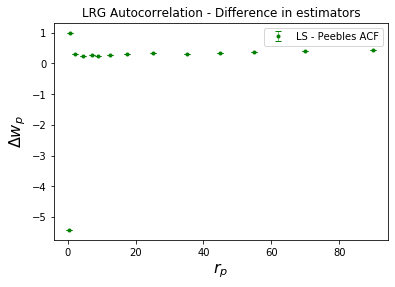

In [23]:
plt.errorbar(rp_xc_Pjackpi10LS,wp_xc_Pjackpi10 - wp_xc_Pjackpi10LS,yerr=0,fmt='.',color='g', capsize = 3, elinewidth = 0.5, label='LS - Peebles ACF')
plt.legend(frameon=True,numpoints=1)
plt.xlabel('$r_{p}$',fontsize=16)
plt.ylabel('$\Delta  w_{p}$',fontsize=16)
plt.title('LRG Autocorrelation - Difference in estimators')
plt.savefig('output/PlotsGraphs/10NovNewRandom/LRG_ACF_LSvsPeebDiff_pi60.png')

In [5]:
# 10/09/2017, running to match cross correlation functions
pimax=60
#bins = np.array([1,3,6,8,10,15,20,30,40,50,60])
# 10/13/2017, running to match cross correlation functions
bins = np.array([1,4,8,16,32,40,50,60,100])

print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
#rp,wp_p,wp_p_err_boot,cov_boot,wp_arr_boot = w.auto_wp(LRG, LRGr, bins, pimax, m=100,estimator='P',errtype='b')
rp,wp_p,wp_p_err_jack,cov_jack = w.auto_wp(LRG, LRGr, bins, pimax, m=100,estimator='P')
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

2017-10-19 20:16:27
beginning Bootstrap
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 100
77 / 100
78 / 100
79 / 100
80 / 100
81 / 100
82 / 100
83 / 100
84 / 100
85 / 100
86 / 100
87 / 100
88 / 100
89 / 100
90 / 100
91 / 100
92 / 100
93 / 100
94 / 100
95 / 100
96 / 100
97 / 100
98 / 100
99 / 100
100 / 100
2017-10-29 09:39:16


In [6]:
np.save('output/rp_LRGrgt1.npy', rp)
np.save('output/wp_p_LRGrgt1',wp_p)
np.save('output/wp_p_err_LRGrgt1', wp_p_err_boot)
np.save('output/cov_LRGrgt1',cov_boot)
np.save('output/wp_arr_LRGrgt1',wp_arr_boot)

## Read in LRG files from Nikhil & create out file with values of interest (ra,dec,z,cdist)

In [16]:
# read in LRG files from Nikhil
tS = Table.read('..\codes\cat\galaxy_DR12v5_LOWZ_South.fits')
tN = Table.read('..\codes\cat\galaxy_DR12v5_LOWZ_North.fits')
#Append the 2 files together (North & Soutn)
LRGra=np.concatenate((tN['RA'],tS['RA']),0)
LRGdec=np.concatenate((tN['DEC'],tS['DEC']),0)
LRGz=np.concatenate((tN['Z'],tS['Z']),0)
#Make an array that contains only ra,dec&z, and select only those LRGs at z's of the peas
temp=list(zip(LRGra,LRGdec,LRGz))
LRG=np.zeros((len(LRGz),), dtype=[('ra', '<f8'),('dec', '<f8'),('z', '<f8')])
LRG[:] = temp
LRG = LRG[(LRG['z']>.112) & (LRG['z']<.36)]
print(len(LRG))
print(LRG)

287751
[(195.21170965, -0.50525837, 0.34588838)
 (225.58697054, -0.04653204, 0.33261034)
 (225.5136923 , -0.19025989, 0.33253074) ...
 (317.8614391 ,  2.57847068, 0.26642042)
 (328.08779661,  1.25104375, 0.11979926)
 (329.67162612,  1.25815312, 0.21810117)]


In [4]:
from astropy.io.fits import getheader
hdr=getheader('..\codes\cat\galaxy_DR12v5_LOWZ_South.fits')

In [15]:
#print(hdr.names)
print(tS)

    RA        DEC             Z          ...      PSF_FWHM [5]      ZINDX 
---------- --------- ------------------- ... ---------------------- ------
 341.64382 22.744648  0.3581112027168274 ... 1.2353776 .. 1.0369885  66726
 339.98639 13.279577  0.3433419466018677 ... 1.3340514 .. 1.0729594  19671
358.325043 22.101216  0.3340875208377838 ... 1.4315891 .. 1.1900231  41578
 11.080719 22.798487 0.10490182787179947 ... 1.5567251 .. 1.1655307 123882
359.466067 16.501436 0.24671000242233276 ...  1.676938 .. 1.2556009 120063
 36.724067 -4.629091 0.11613655090332031 ... 1.8665994 .. 1.3812191  86879
349.065908 32.818904   0.377922922372818 ...  2.137209 .. 1.7656196  53118
  0.296508  0.938452 0.29151031374931335 ... 1.2346448 .. 1.3313928  14543
 329.36414 -0.628746  0.2766815423965454 ...   1.4716791 .. 1.14357  65417
351.657486  0.555609  0.3631933927536011 ...  1.2058847 .. 1.135982  79883
       ...       ...                 ... ...                    ...    ...
 24.432058 12.756479 0.34

In [6]:
print(hdr)


SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                   16 / number of bits per data pixel                  NAXIS   =                    0 / number of data axes                            EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H END                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [7]:
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
#Add new array field of comoving distances
cdists = np.array([cosmo.comoving_distance(z).value for z in LRG['z']])*cosmo.h
LRG = append_fields(LRG, 'cdist', cdists)
# append the field and make back into normal array
LRG=np.array(LRG)
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

2020-07-04 01:30:04
2020-07-04 01:30:17


## b/f play this code runs

In [10]:
# read in LRG randoms files from BOSS survey (note takes a min to read int)
tS = Table.read('..\codes\cat\random0_DR12v5_LOWZ_South.fits')
tN = Table.read('..\codes\cat\random0_DR12v5_LOWZ_North.fits')

In [13]:
%%time
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
#Append the 2 files together (North & Soutn) (Note takes a min to run)
LRGrar=np.concatenate((tN['RA'],tS['RA']),0)
LRGdecr=np.concatenate((tN['DEC'],tS['DEC']),0)
LRGzr=np.concatenate((tN['Z'],tS['Z']),0)
#Make an array that contains only ra,dec&z, and select only those LRGs at z's of the peas
temp=list(zip(LRGrar,LRGdecr,LRGzr))
LRGr=np.zeros((len(LRGzr),), dtype=[('ra', '<f8'),('dec', '<f8'),('z', '<f8')])
LRGr[:] = temp
LRGr = LRGr[(LRGr['z']>.112) & (LRGr['z']<.36)]
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))


2020-07-04 01:32:26
2020-07-04 01:32:37
Wall time: 11.2 s


In [18]:
%%time
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
#Add new array field of comoving distances (note: takes a ~8-10 min to run)
cdists = np.array([cosmo.comoving_distance(z).value for z in LRGr['z']])*cosmo.h
print(cdists)
LRGr = append_fields(LRGr, 'cdist', cdists)
# append the field and make back into normal array
LRGr=np.array(LRGr)
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

2020-07-04 01:50:42
[959.49163193 625.40224356 598.46195961 ... 672.48081696 391.82925225
 553.53715677]
2020-07-04 02:01:26
Wall time: 10min 44s


In [27]:
## EDIT 6/30, let's keep it large for now to see what the result will be.
##Note - file needed be QUITE so large, what about making it smaller?
sm=len(LRGr)/2
print(sm)
if sm%2 == 1:
    sm=sm+1
sm=int(sm)
ind = np.random.randint(len(LRGr), size=sm)
LRGrsm=LRGr[ind]
print(len(LRGr),len(LRGrsm))
print(LRGrsm)

7072265.0
14144530 7072266
[(158.559365, 39.045912, 0.35610524, 978.09751   )
 (160.434051, 19.247111, 0.17788139, 511.27955292)
 (157.582605, 29.27068 , 0.28484562, 796.94222062) ...
 (140.820972, 58.337356, 0.15250239, 441.07712165)
 (359.753499, 10.587758, 0.21329316, 607.68250881)
 (194.541573,  8.893609, 0.25206167, 711.14547597)]


In [28]:
print (LRGr)

[(220.69122 , 23.695234, 0.34865251, 959.49163193)
 (237.275777,  3.814782, 0.21987551, 625.40224356)
 (151.965079, 46.003255, 0.20987718, 598.46195961) ...
 ( 27.196452, -6.263316, 0.23747812, 672.48081696)
 (  8.291472, -8.074354, 0.13489519, 391.82925225)
 (332.556493, 12.387489, 0.19332214, 553.53715677)]


C:\Users\mxo431\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
C:\Users\mxo431\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


(array([ 246312.,  982018., 1201050., 1109198., 1075453.,  822250.,
         537693.,  501032.,  405555.,  191705.]),
 array([-10.999844 ,  -3.0249436,   4.9499568,  12.9248572,  20.8997576,
         28.874658 ,  36.8495584,  44.8244588,  52.7993592,  60.7742596,
         68.74916  ]),
 <a list of 10 Patch objects>)

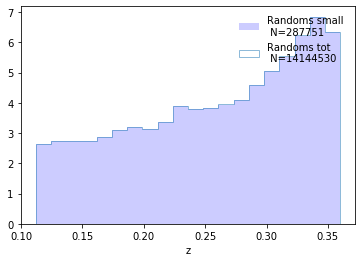

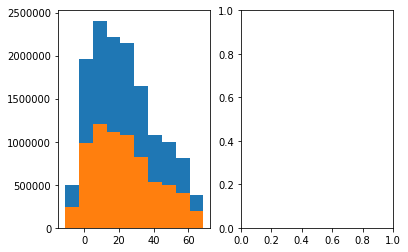

In [20]:
nd = len(LRG)
nr = len(LRGr)
plt.hist(LRGrsm['z'], histtype='stepfilled', bins=20,alpha=0.2,color='b',weights=None,normed=True,\
         label='Randoms small \n N='+str(nd))
plt.hist(LRGr['z'], histtype='step', bins=20,alpha=0.5,normed=True,weights=None,\
         label='Randoms tot\n N='+str(nr))
plt.xlabel('z')
plt.legend(loc='best', frameon=False)

f,(ax1,ax2)=plt.subplots(1,2)
ax1.hist(LRGr['dec'])
ax1.hist(LRGrsm['dec'], )

(array([  246015.,   982128.,  1202692.,  1109257.,  1076572.,   821843.,
          535398.,   500412.,   406205.,   191744.]),
 array([-10.999796 ,  -3.0249004,   4.9499952,  12.9248908,  20.8997864,
         28.874682 ,  36.8495776,  44.8244732,  52.7993688,  60.7742644,
         68.74916  ]),
 <a list of 10 Patch objects>)

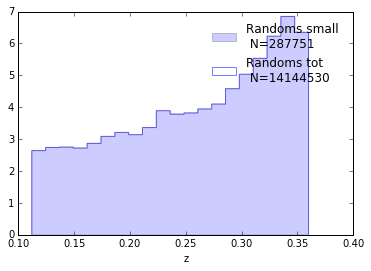

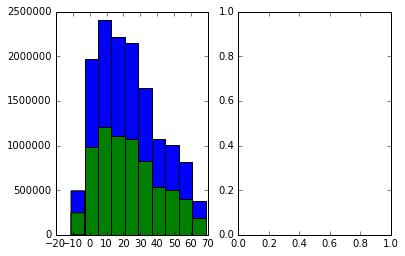

In [30]:
##check histograms
#nd = len(LRG)
#nr = len(LRGr)
#plt.hist(LRGrsm['z'], histtype='stepfilled', bins=20,alpha=0.2,color='b',weights=None,normed=True,\
#         label='Randoms small \n N='+str(nd))
#plt.hist(LRGr['z'], histtype='step', bins=20,alpha=0.5,normed=True,weights=None,\
#         label='Randoms tot\n N='+str(nr))
#plt.xlabel('z')
#plt.legend(loc='best', frameon=False)
#
##f,(ax1,ax2)=plt.subplots(1,2)
##ax1.hist(LRGr['dec'])
##ax1.hist(LRGrsm['dec'], )

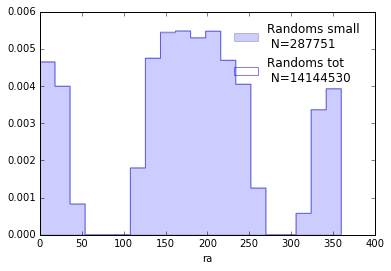

In [32]:
#plt.hist(LRGrsm['ra'], histtype='stepfilled', bins=20,alpha=0.2,color='b',weights=None,normed=True,\
#         label='Randoms small \n N='+str(nd))
#plt.hist(LRGr['ra'], histtype='step', bins=20,alpha=0.5,normed=True,weights=None,\
#         label='Randoms tot\n N='+str(nr))
#plt.xlabel('ra')
#plt.legend(loc='best', frameon=False)


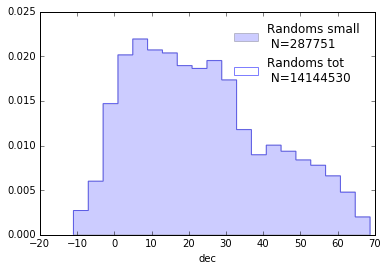

In [33]:
#plt.hist(LRGrsm['dec'], histtype='stepfilled', bins=20,alpha=0.2,color='b',weights=None,normed=True,\
#         label='Randoms small \n N='+str(nd))
#plt.hist(LRGr['dec'], histtype='step', bins=20,alpha=0.5,normed=True,weights=None,\
#         label='Randoms tot\n N='+str(nr))
#plt.xlabel('dec')
#plt.legend(loc='best', frameon=False)


In [30]:
#print(LRG.dtype.names)
#print(LRGr.dtype.names)
#print(LRGrsm.dtype.names)

### OUtput created catalogs, note not happy if they already exist
#t = Table(LRG)
#t.write('../cat/LRGzcat.fits',format='fits')
#tr = Table(LRGr)
#tr.write('..\codes\cat\LRGRandzcatfull.fits',format='fits')
trsm = Table(LRGrsm)
trsm.write('..\codes\cat\LRGRandzcat.fits',format='fits')

In [37]:
#print(len(LRGr)/len(LRG))
#print(len(LRGrsm)/len(LRG))

49.15545037202303
24.577728661238364


## Start here to use created LRG catalogs for correlation functions

In [4]:
LRG= Table.read('../codes/cat/LRGzcat.fits')
LRGr=Table.read('../codes/cat/LRGRandzcat.fits')

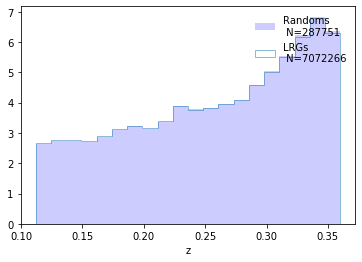

In [5]:
nd = len(LRG)
nr = len(LRGr)
plt.hist(LRGr['z'], histtype='stepfilled', bins=20,alpha=0.2,color='b',weights=None,density=True,\
         label='Randoms \n N='+str(nd))
plt.hist(LRG['z'], histtype='step', bins=20,alpha=0.5,density=True,weights=None,\
         label='LRGs\n N='+str(nr))
plt.xlabel('z')
plt.legend(loc='best', frameon=False)


C:\Users\mxo431\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
C:\Users\mxo431\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


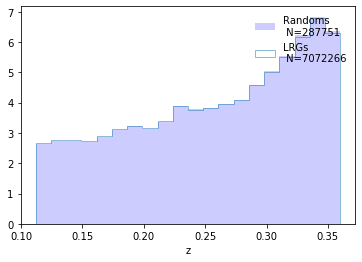

In [34]:
nd = len(LRG)
nr = len(LRGr)
plt.hist(LRGr['z'], histtype='stepfilled', bins=20,alpha=0.2,color='b',weights=None,normed=True,\
         label='Randoms \n N='+str(nd))
plt.hist(LRG['z'], histtype='step', bins=20,alpha=0.5,normed=True,weights=None,\
         label='LRGs\n N='+str(nr))
plt.xlabel('z')
plt.legend(loc='best', frameon=False)

In [ ]:
ra = coord.Angle(LRG['ra']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(LRG['dec']*u.degree)

rar = coord.Angle(LRGr['ra']*u.degree)
rar = rar.wrap_at(180*u.degree)
decr = coord.Angle(LRGr['dec']*u.degree)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="aitoff")

ax.scatter(rar.radian,decr.radian,1,color='k',alpha=.1)
ax.scatter(ra.radian, dec.radian,1,color='g',marker='+')
# blue is non-random default color used, black is randoms (k), reds r, cyan is c, green is g, points is transparent
# marker='o', '+', '*','.', 'x','square' or 's'	Square'diamond'or'd','^','v', '>', '<','pentagram' or 'p','hexagram' or 'h','none'
#plt.xlabel('RA')
#plt.xlabel('RA')
plt.title('LRG / Randoms')
plt.legend(loc='best', frameon=False)
plt.savefig('../plots/LRGrand_ra_dec.pdf')

/Users/ccardamone/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


## LRG AutoCorrelation - aka a basic check of autocorr funct program

In [3]:
from clustering.clustering import projected_correlation_functions as w

from clustering.clustering import randoms as rand
from clustering.clustering.utils import wp_d1d2,wp_dd

In [4]:
LRG= Table.read('../codes/cat/LRGzcat.fits')
LRGr=Table.read('../codes/cat/LRGRandzcat.fits')

In [5]:
## Initialize bins, $\pi_{max}$
# set out to 60 Mpc length, as a function of r_p, each scale is integrated from 0 to 60 Mpc
pimax=60
nbins = 10
bins = np.logspace(-1, np.log10(40), nbins + 1)

In [7]:
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
#First line would call program inside projected_correlation_functions.py, 
#   which then calls wp_dd AND auto_jackknife, which calls wp_dd inside error.py a series of times with data block missing
#   this estimates the jackknife errors, and note rp is returned, where it is not in the second call
#LRGrp,LRGwp_p,LRGwp_p_err,LRGcov = w.auto_wp(LRG, LRGr, bins, pimax, m=20, estimator='L')
#LRGwp_p_noerr = wp_dd(LRG, LRGr, bins, pimax, estimator='L')
rpjack,wp_p_jack,wp_p_err_jack,cov_jack,wp_arr_jack = w.auto_wp(LRG, LRGr, bins, pimax, m=20, estimator='P',errtype='j')
rpboot,wp_p,wp_p_err_boot,cov_boot,wp_arr_boot = w.auto_wp(LRG, LRGr, bins, pimax, m=100, estimator='P',errtype='b')
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

2017-07-24 19:04:56
beginning jackknifes
0 0 0 18.0 -90.0 -64.15806723683288
0 0 0 18.0 -64.15806723683288 -53.13010235415599
0 0 0 18.0 -53.13010235415599 -44.42700400080571
0 0 0 18.0 -44.42700400080571 -36.86989764584403
0 0 0 18.0 -36.86989764584403 -30.00000000000001
0 0 0 18.0 -30.00000000000001 -23.578178478201842
0 0 0 18.0 -23.578178478201842 -17.4576031237221
0 0 0 18.0 -17.4576031237221 -11.536959032815496
1267 59507 0 18.0 -11.536959032815496 -5.739170477266795
3357 172662 0 18.0 -5.739170477266795 -7.951386703658792e-15
3884 172131 0 18.0 -7.951386703658792e-15 5.739170477266779
3509 155934 0 18.0 5.739170477266779 11.53695903281548
3454 166326 0 18.0 11.53695903281548 17.457603123722084
3054 156890 0 18.0 17.457603123722084 23.578178478201824
3558 160425 0 18.0 23.578178478201824 29.999999999999993
2904 138650 0 18.0 29.999999999999993 36.86989764584401
0 0 0 18.0 36.86989764584401 44.427004000805695
0 0 0 18.0 44.427004000805695 53.130102354155966
0 0 0 18.0 53.130102354

TypeError: 'NoneType' object is not iterable

In [10]:
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
#First line would call program inside projected_correlation_functions.py, 
#   which then calls wp_dd AND auto_jackknife, which calls wp_dd inside error.py a series of times with data block missing
#   this estimates the jackknife errors, and note rp is returned, where it is not in the second call
#LRGrp,LRGwp_p,LRGwp_p_err,LRGcov = w.auto_wp(LRG, LRGr, bins, pimax, m=20, estimator='L')
#LRGwp_p_noerr = wp_dd(LRG, LRGr, bins, pimax, estimator='L')
rpjack,wp_p_jack,wp_p_err_jack,cov_jack,wp_arr_jack = w.auto_wp(LRG, LRGr, bins, pimax, m=20, estimator='P',)
rpboot,wp_p,wp_p_err_boot,cov_boot,wp_arr_boot = w.auto_wp(LRG, LRGr, bins, pimax, m=100, estimator='P')
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

2020-07-05 00:00:17


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.045 sec
Using AVX kernel
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.444 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.040 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.091 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   1.688 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.598 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   1

Using  400  jacknife samples
1 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.087 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.732 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.495 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.696 sec
countpai

2 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.038 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.730 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.552 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.695 sec
countpai

3 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.439 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.738 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.538 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.668 sec
countpai

4 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.441 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.087 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.730 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.579 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.689 sec
countpai

5 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.039 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.710 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.519 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.675 sec
countpai

6 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.439 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.728 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.516 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.672 sec
countpai

7 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.440 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.712 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.511 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.672 sec
countpai

8 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.038 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.448 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.087 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.723 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.507 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.682 sec
countpai

9 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 727. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.722 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.394 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.684 sec
countpai

10 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.038 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.412 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 716. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.724 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.795 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.659 sec
countpai

11 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.402 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.039 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 714. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.089 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.721 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.475 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.657 sec
countpai

12 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.405 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.038 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 715. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.731 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.539 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.643 sec
countpai

13 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.416 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 716. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.713 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.610 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.650 sec
countpai

14 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.413 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 717. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.717 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.834 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.650 sec
countpai

15 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.442 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.087 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.711 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.486 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.643 sec
countpai

16 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.038 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.087 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.720 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.519 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.653 sec
countpai

17 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.731 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.499 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.641 sec
countpai

18 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.038 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.440 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.716 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.489 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.634 sec
countpai

19 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.444 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.722 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.498 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.645 sec
countpai

20 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.439 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.087 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.695 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.477 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.632 sec
countpai

21 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.439 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.695 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.491 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.626 sec
countpai

22 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.038 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.439 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.088 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.684 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.470 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.615 sec
countpai

23 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.440 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.688 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.490 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.603 sec
countpai

24 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.441 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.087 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.676 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.455 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.625 sec
countpai

25 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.675 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.459 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.614 sec
countpai

26 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.672 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.493 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.606 sec
countpai

27 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.038 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.445 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.688 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.482 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.607 sec
countpai

28 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.652 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.457 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.618 sec
countpai

29 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 727. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.650 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.453 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.598 sec
countpai

30 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.408 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 714. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.626 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.562 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.574 sec
countpai

31 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.403 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 715. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.612 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.567 sec
countpai

32 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.415 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 718. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.640 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.734 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.583 sec
countpai

33 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.415 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 719. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.634 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.832 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.584 sec
countpai

34 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.423 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 720. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.629 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.001 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.584 sec
countpai

35 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.434 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.636 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.419 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.605 sec
countpai

36 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.038 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.629 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.378 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.590 sec
countpai

37 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.038 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.629 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.394 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.600 sec
countpai

38 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.038 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.608 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.382 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.592 sec
countpai

39 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.434 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.643 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.449 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.612 sec
countpai

40 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.087 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.623 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.485 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.606 sec
countpai

41 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.442 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.038 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.087 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.667 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.563 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.592 sec
countpai

42 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.606 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.394 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.582 sec
countpai

43 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.614 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.351 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.602 sec
countpai

44 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.615 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.318 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.602 sec
countpai

45 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.434 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.631 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.360 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.584 sec
countpai

46 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.625 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.332 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.596 sec
countpai

47 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.632 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.344 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.618 sec
countpai

48 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.038 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.608 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.368 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.593 sec
countpai

49 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 727. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.621 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.340 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.596 sec
countpai

50 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.422 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 721. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.600 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.965 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.584 sec
countpai

51 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.431 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 724. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.605 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.136 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.590 sec
countpai

52 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.606 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.327 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.597 sec
countpai

53 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.612 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.365 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.600 sec
countpai

54 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.635 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.364 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.595 sec
countpai

55 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.434 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.648 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.347 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.625 sec
countpai

56 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.630 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.352 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.604 sec
countpai

57 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.619 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.328 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.595 sec
countpai

58 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.608 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.332 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.595 sec
countpai

59 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.088 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.613 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.341 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.590 sec
countpai

60 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.608 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.350 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.593 sec
countpai

61 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.642 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.365 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.624 sec
countpai

62 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.622 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.323 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.615 sec
countpai

63 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.087 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.619 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.350 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.591 sec
countpai

64 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.439 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.630 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.346 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.596 sec
countpai

65 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.621 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.340 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.587 sec
countpai

66 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.647 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.345 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.610 sec
countpai

67 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.633 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.360 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.618 sec
countpai

68 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.434 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.640 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.360 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.597 sec
countpai

69 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.618 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.347 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.599 sec
countpai

70 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.033 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.622 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.329 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.595 sec
countpai

71 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.450 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.629 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.605 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.589 sec
countpai

72 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.434 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.603 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.318 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.607 sec
countpai

73 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.433 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.610 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.316 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.597 sec
countpai

74 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.432 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.620 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.312 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.594 sec
countpai

75 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.624 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.313 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.608 sec
countpai

76 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.434 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.622 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.599 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.593 sec
countpai

77 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.614 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.316 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.595 sec
countpai

78 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.637 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.301 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.596 sec
countpai

79 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.434 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.629 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.295 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.596 sec
countpai

80 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.434 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.626 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.314 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.590 sec
countpai

81 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.434 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.619 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.306 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.586 sec
countpai

82 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.615 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.310 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.612 sec
countpai

83 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.605 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.327 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.586 sec
countpai

84 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.434 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.644 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.304 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.620 sec
countpai

85 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.433 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.621 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.302 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.604 sec
countpai

86 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.629 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.318 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.596 sec
countpai

87 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.615 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.324 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.593 sec
countpai

88 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.610 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.304 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.598 sec
countpai

89 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.087 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.632 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.297 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.605 sec
countpai

90 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.605 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.310 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.588 sec
countpai

91 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.432 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.611 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.315 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.579 sec
countpai

92 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.433 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.642 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.325 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.586 sec
countpai

93 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.613 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.311 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.591 sec
countpai

94 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.617 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.311 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.578 sec
countpai

95 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.615 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.308 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.608 sec
countpai

96 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.621 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.316 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.594 sec
countpai

97 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.434 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.630 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.314 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.594 sec
countpai

98 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.623 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.317 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.601 sec
countpai

99 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.636 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.327 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.601 sec
countpai

100 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.608 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.322 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.577 sec
countpai

101 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.618 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.323 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.599 sec
countpai

102 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.599 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.309 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.587 sec
countpai

103 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.434 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.622 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.297 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.594 sec
countpai

104 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.619 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.316 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.577 sec
countpai

105 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.632 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.288 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.578 sec
countpai

106 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.610 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.322 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.588 sec
countpai

107 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.434 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.624 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.316 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.605 sec
countpai

108 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.038 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.433 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.613 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.339 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.595 sec
countpai

109 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.434 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.654 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.318 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.599 sec
countpai

110 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.627 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.314 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.589 sec
countpai

111 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.627 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.320 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.581 sec
countpai

112 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.620 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.313 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.603 sec
countpai

113 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.434 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.606 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.302 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.592 sec
countpai

114 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.434 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.622 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.317 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.593 sec
countpai

115 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.623 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.300 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.590 sec
countpai

116 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.439 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.641 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.299 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.594 sec
countpai

117 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.605 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.309 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.579 sec
countpai

118 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.614 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.309 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.597 sec
countpai

119 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.434 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.627 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.321 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.589 sec
countpai

120 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.433 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.087 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.645 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.304 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.594 sec
countpai

121 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.605 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.306 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.589 sec
countpai

122 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.609 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.309 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.597 sec
countpai

123 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.612 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.328 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.603 sec
countpai

124 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.627 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.358 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.622 sec
countpai

125 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.433 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.087 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.628 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.328 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.603 sec
countpai

126 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.606 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.305 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.597 sec
countpai

127 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.631 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.299 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.593 sec
countpai

128 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.627 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.298 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.586 sec
countpai

129 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.434 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.617 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.310 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.584 sec
countpai

130 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 727. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.631 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.306 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.614 sec
countpai

131 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.430 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 724. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.606 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.128 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.587 sec
countpai

132 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.440 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 721. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.610 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.161 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.625 sec
countpai

133 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.427 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 719. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.626 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.019 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.582 sec
countpai

134 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.431 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 723. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.625 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.220 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.606 sec
countpai

135 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.434 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.612 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.443 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.587 sec
countpai

136 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.443 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.626 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.469 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.592 sec
countpai

137 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.439 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 727. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.621 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.433 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.589 sec
countpai

138 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.618 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.499 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.584 sec
countpai

139 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.434 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.617 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.476 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.594 sec
countpai

140 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.441 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.642 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.494 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.594 sec
countpai

141 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.440 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.619 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.486 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.593 sec
countpai

142 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.624 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.475 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.613 sec
countpai

143 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.622 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.843 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.590 sec
countpai

144 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.444 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.635 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.498 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.590 sec
countpai

145 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.610 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.503 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.611 sec
countpai

146 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.626 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.517 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.604 sec
countpai

147 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.441 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.631 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.497 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.605 sec
countpai

148 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.440 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.620 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.497 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.582 sec
countpai

149 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.637 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.516 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.582 sec
countpai

150 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 727. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.661 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.494 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.596 sec
countpai

151 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.422 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 720. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.614 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.985 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.603 sec
countpai

152 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.409 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 716. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.629 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.632 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.587 sec
countpai

153 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.420 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 717. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.612 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.830 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.593 sec
countpai

154 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.419 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 717. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.639 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.872 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.604 sec
countpai

155 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.429 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 721. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.609 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.179 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.579 sec
countpai

156 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.426 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 721. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.617 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.080 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.572 sec
countpai

157 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.420 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 721. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.607 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.031 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.592 sec
countpai

158 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.434 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 727. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.631 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.424 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.584 sec
countpai

159 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.441 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.616 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.497 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.586 sec
countpai

160 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.440 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.629 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.485 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.611 sec
countpai

161 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.439 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.624 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.452 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.615 sec
countpai

162 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.627 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.456 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.604 sec
countpai

163 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.439 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.642 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.467 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.592 sec
countpai

164 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.634 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.441 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.596 sec
countpai

165 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.635 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.440 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.611 sec
countpai

166 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.614 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.418 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.622 sec
countpai

167 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.612 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.606 sec
countpai

168 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.439 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.626 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.442 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.584 sec
countpai

169 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.613 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.412 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.599 sec
countpai

170 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.439 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.617 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.432 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.592 sec
countpai

171 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.416 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 718. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.081 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.600 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.763 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.592 sec
countpai

172 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.402 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 715. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.623 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.485 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.598 sec
countpai

173 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.410 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 716. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.625 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.590 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.592 sec
countpai

174 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.413 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 717. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.594 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.641 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.589 sec
countpai

175 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.415 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 718. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.621 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.730 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.598 sec
countpai

176 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.422 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 719. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.626 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.826 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.607 sec
countpai

177 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.422 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 721. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.631 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.973 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.609 sec
countpai

178 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 726. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.615 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.310 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.589 sec
countpai

179 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.620 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.396 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.594 sec
countpai

180 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.632 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.363 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.612 sec
countpai

181 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.616 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.367 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.594 sec
countpai

182 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.605 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.370 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.586 sec
countpai

183 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.621 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.375 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.600 sec
countpai

184 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.613 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.375 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.604 sec
countpai

185 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.033 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.622 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.367 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.589 sec
countpai

186 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.624 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.392 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.591 sec
countpai

187 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.605 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.376 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.611 sec
countpai

188 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.639 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.387 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.593 sec
countpai

189 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.635 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.390 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.609 sec
countpai

190 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.621 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.351 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.604 sec
countpai

191 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.414 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 718. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.621 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.773 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.590 sec
countpai

192 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.409 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 715. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.613 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.490 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.578 sec
countpai

193 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.407 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 716. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.611 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.545 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.573 sec
countpai

194 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.411 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 717. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.615 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.614 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.591 sec
countpai

195 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.413 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 718. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.080 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.626 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.640 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.572 sec
countpai

196 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.419 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 719. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.088 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.673 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.379 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.604 sec
countpai

197 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.420 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 721. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.601 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.879 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.588 sec
countpai

198 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.038 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.455 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 725. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.637 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 39.628 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.638 sec
countpai

199 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.443 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.088 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.722 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.792 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.596 sec
countpai

200 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.477 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.622 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 39.279 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.609 sec
countpai

201 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.441 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.656 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.520 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.593 sec
countpai

202 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.460 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.656 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 39.260 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.585 sec
countpai

203 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.441 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.650 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.961 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.615 sec
countpai

204 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.470 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.641 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 39.179 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.606 sec
countpai

205 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.039 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.459 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.660 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 39.349 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.593 sec
countpai

206 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.624 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.349 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.596 sec
countpai

207 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.038 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.447 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.616 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 39.946 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.615 sec
countpai

208 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.457 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.091 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.661 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 39.296 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.593 sec
countpai

209 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.615 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.403 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.597 sec
countpai

210 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 727. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.622 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.371 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.598 sec
countpai

211 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.415 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 717. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.622 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.751 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.583 sec
countpai

212 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.413 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 715. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.081 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.620 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.586 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.588 sec
countpai

213 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.409 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 716. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.623 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.550 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.582 sec
countpai

214 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.419 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 719. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.640 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.812 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.619 sec
countpai

215 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.419 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 721. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.619 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.977 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.606 sec
countpai

216 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.414 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 719. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.081 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.626 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.740 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.577 sec
countpai

217 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.423 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 721. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.609 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.893 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.584 sec
countpai

218 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.434 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 724. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.621 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.199 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.591 sec
countpai

219 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.440 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.620 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.413 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.588 sec
countpai

220 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.614 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.461 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.593 sec
countpai

221 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.440 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.633 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.488 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.604 sec
countpai

222 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.443 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.622 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.517 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.600 sec
countpai

223 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.439 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.618 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.461 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.593 sec
countpai

224 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.627 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.491 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.616 sec
countpai

225 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.618 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.473 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.599 sec
countpai

226 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.442 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.618 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.498 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.583 sec
countpai

227 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.636 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.783 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.605 sec
countpai

228 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.441 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.635 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.503 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.597 sec
countpai

229 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.445 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.632 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.510 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.620 sec
countpai

230 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.430 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 723. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.640 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.239 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.604 sec
countpai

231 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.414 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 715. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.626 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.686 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.566 sec
countpai

232 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.415 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 715. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.081 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.636 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.648 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.595 sec
countpai

233 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.415 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 716. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.636 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.733 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.579 sec
countpai

234 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.423 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 722. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.613 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.094 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.597 sec
countpai

235 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.425 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 721. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.626 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.070 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.589 sec
countpai

236 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.418 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 719. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.630 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.750 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.603 sec
countpai

237 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.417 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 721. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.615 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.827 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.579 sec
countpai

238 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.432 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 725. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.614 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.236 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.586 sec
countpai

239 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.629 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.370 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.592 sec
countpai

240 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.624 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.347 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.608 sec
countpai

241 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.643 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.354 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.611 sec
countpai

242 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.614 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.381 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.583 sec
countpai

243 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.434 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.636 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.350 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.591 sec
countpai

244 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.439 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.650 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.369 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.612 sec
countpai

245 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.611 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.366 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.591 sec
countpai

246 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.621 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.378 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.601 sec
countpai

247 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.641 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.361 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.600 sec
countpai

248 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.440 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.616 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.364 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.595 sec
countpai

249 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.617 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.362 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.603 sec
countpai

250 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.429 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 724. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.618 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.161 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.595 sec
countpai

251 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.410 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 715. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.623 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.565 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.600 sec
countpai

252 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.409 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 716. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.620 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.595 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.592 sec
countpai

253 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.418 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 721. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.625 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.902 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.578 sec
countpai

254 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.424 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 724. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.618 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.097 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.592 sec
countpai

255 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.417 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 719. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.620 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.802 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.592 sec
countpai

256 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.418 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 719. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.618 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.832 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.577 sec
countpai

257 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.038 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.424 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 722. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.620 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.947 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.577 sec
countpai

258 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 727. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.636 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.314 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.598 sec
countpai

259 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.621 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.363 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.587 sec
countpai

260 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.434 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.613 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.375 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.603 sec
countpai

261 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.619 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.358 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.609 sec
countpai

262 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.636 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.389 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.585 sec
countpai

263 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.434 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.629 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.361 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.604 sec
countpai

264 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.621 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.370 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.605 sec
countpai

265 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.631 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.354 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.603 sec
countpai

266 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.649 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.374 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.586 sec
countpai

267 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.629 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.367 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.605 sec
countpai

268 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.613 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.386 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.584 sec
countpai

269 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.439 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.634 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.361 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.599 sec
countpai

270 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 727. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.616 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.343 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.606 sec
countpai

271 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.426 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 722. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.607 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.053 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.595 sec
countpai

272 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.422 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 719. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.081 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.606 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.888 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.583 sec
countpai

273 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.425 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 722. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.613 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.992 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.574 sec
countpai

274 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.033 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.414 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 717. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.616 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.687 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.582 sec
countpai

275 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.417 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 718. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.606 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.716 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.599 sec
countpai

276 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.421 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 720. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.633 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.840 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.587 sec
countpai

277 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.426 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 724. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.081 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.632 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.138 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.578 sec
countpai

278 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.609 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.369 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.602 sec
countpai

279 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.626 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.394 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.598 sec
countpai

280 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.434 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.618 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.400 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.590 sec
countpai

281 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.644 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.358 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.622 sec
countpai

282 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.622 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.368 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.581 sec
countpai

283 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.610 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.369 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.581 sec
countpai

284 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.628 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.358 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.590 sec
countpai

285 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.439 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.633 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 39.418 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.613 sec
countpai

286 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.612 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.385 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.589 sec
countpai

287 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.038 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.619 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.647 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 39.033 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.604 sec
countpai

288 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.634 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.396 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.584 sec
countpai

289 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.641 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.430 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.604 sec
countpai

290 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.440 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.632 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.396 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.597 sec
countpai

291 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.618 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.399 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.587 sec
countpai

292 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 727. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.625 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.379 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.606 sec
countpai

293 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.429 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 723. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.611 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.125 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.574 sec
countpai

294 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.425 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 721. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.615 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.036 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.586 sec
countpai

295 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.431 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 724. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.623 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.145 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.573 sec
countpai

296 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 726. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.606 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.331 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.591 sec
countpai

297 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.611 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.406 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.581 sec
countpai

298 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.622 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.393 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.602 sec
countpai

299 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.623 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.402 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.593 sec
countpai

300 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.627 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.408 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.616 sec
countpai

301 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.637 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.389 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.601 sec
countpai

302 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.439 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.623 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.389 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.593 sec
countpai

303 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.619 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.395 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.612 sec
countpai

304 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.441 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.644 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.401 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.600 sec
countpai

305 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.439 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.626 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.415 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.585 sec
countpai

306 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.439 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.628 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.429 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.600 sec
countpai

307 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.439 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.636 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.389 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.616 sec
countpai

308 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.635 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.399 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.600 sec
countpai

309 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.636 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.409 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.603 sec
countpai

310 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.439 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.624 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.424 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.595 sec
countpai

311 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.440 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.033 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.632 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.425 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.596 sec
countpai

312 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.634 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.375 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.601 sec
countpai

313 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.440 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.625 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.399 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.594 sec
countpai

314 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.632 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.366 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.594 sec
countpai

315 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.630 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.405 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.602 sec
countpai

316 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.081 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.624 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.404 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.605 sec
countpai

317 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.617 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.414 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.593 sec
countpai

318 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.638 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.405 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.608 sec
countpai

319 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.439 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.610 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.397 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.589 sec
countpai

320 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.626 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.517 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.614 sec
countpai

321 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.444 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.646 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.397 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.607 sec
countpai

322 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.439 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.620 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.400 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.597 sec
countpai

323 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.634 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.390 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.616 sec
countpai

324 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.644 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.385 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.593 sec
countpai

325 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.627 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.418 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.596 sec
countpai

326 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.621 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.721 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.588 sec
countpai

327 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.439 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.632 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.397 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.611 sec
countpai

328 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.622 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.420 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.608 sec
countpai

329 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.630 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.399 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.594 sec
countpai

330 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.624 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.388 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.579 sec
countpai

331 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.621 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.364 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.623 sec
countpai

332 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.636 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.376 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.595 sec
countpai

333 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.614 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.366 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.583 sec
countpai

334 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.433 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.643 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.361 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.616 sec
countpai

335 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.439 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.616 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.373 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.610 sec
countpai

336 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.619 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.384 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.603 sec
countpai

337 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.434 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.614 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.347 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.603 sec
countpai

338 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.625 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.376 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.594 sec
countpai

339 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.632 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.385 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.590 sec
countpai

340 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.638 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.372 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.617 sec
countpai

341 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.038 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.618 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.371 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.602 sec
countpai

342 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.609 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.373 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.596 sec
countpai

343 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.637 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.361 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.614 sec
countpai

344 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.616 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.382 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.589 sec
countpai

345 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.434 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.625 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.367 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.598 sec
countpai

346 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.439 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.625 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.373 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.607 sec
countpai

347 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.622 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.380 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.586 sec
countpai

348 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.634 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.371 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.609 sec
countpai

349 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.620 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.381 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.582 sec
countpai

350 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.432 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 726. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.630 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.280 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.597 sec
countpai

351 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.453 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 722. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.609 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.106 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.587 sec
countpai

352 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 727. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.648 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.347 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.580 sec
countpai

353 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.440 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.608 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.384 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.588 sec
countpai

354 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.434 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.646 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.396 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.624 sec
countpai

355 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.631 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.384 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.600 sec
countpai

356 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.612 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.378 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.589 sec
countpai

357 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.635 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.383 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.602 sec
countpai

358 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.439 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.635 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.363 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.585 sec
countpai

359 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.626 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.380 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.593 sec
countpai

360 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.621 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.361 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.604 sec
countpai

361 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.641 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.390 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.603 sec
countpai

362 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.435 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.628 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.384 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.604 sec
countpai

363 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.439 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.643 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.378 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.599 sec
countpai

364 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.612 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.392 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.580 sec
countpai

365 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.628 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.388 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.606 sec
countpai

366 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.439 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.653 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.381 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.622 sec
countpai

367 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.621 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.393 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.596 sec
countpai

368 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.635 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.371 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.610 sec
countpai

369 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.621 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.364 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.598 sec
countpai

370 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.426 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 723. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.615 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.097 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.611 sec
countpai

371 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.404 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 714. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.638 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.476 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.585 sec
countpai

372 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.417 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 717. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.631 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.743 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.591 sec
countpai

373 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.418 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.033 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 718. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.612 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.857 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.585 sec
countpai

374 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.429 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 722. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.629 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.110 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.586 sec
countpai

375 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.617 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.385 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.607 sec
countpai

376 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.087 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.653 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.453 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.608 sec
countpai

377 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.631 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.376 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.588 sec
countpai

378 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.620 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.386 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.603 sec
countpai

379 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.439 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.638 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.410 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.587 sec
countpai

380 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.617 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.397 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.605 sec
countpai

381 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.438 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.636 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.371 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.601 sec
countpai

382 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.618 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.375 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.592 sec
countpai

383 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.434 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.632 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.367 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.607 sec
countpai

384 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.630 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.385 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.595 sec
countpai

385 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.616 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.391 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.590 sec
countpai

386 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.434 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.612 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.406 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.598 sec
countpai

387 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.439 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.624 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.419 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.597 sec
countpai

388 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.608 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.412 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.581 sec
countpai

389 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 727. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.649 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.403 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.593 sec
countpai

390 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.425 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 721. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.629 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.015 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.581 sec
countpai

391 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.038 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.403 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 715. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.081 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.631 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.407 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.581 sec
countpai

392 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.039 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.401 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 715. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.081 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.608 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.446 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.582 sec
countpai

393 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.413 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 718. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.615 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.702 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.584 sec
countpai

394 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.038 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.420 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 718. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.625 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 37.948 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.590 sec
countpai

395 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.441 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.630 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.604 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.586 sec
countpai

396 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.437 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.083 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.628 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.490 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.607 sec
countpai

397 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.441 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.625 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.510 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.610 sec
countpai

398 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.436 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.628 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.485 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.602 sec
countpai

399 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.445 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.605 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.527 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.589 sec
countpai

400 / 400


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  1.439 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.623 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 38.528 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.591 sec
countpai

ValueError: not enough values to unpack (expected 5, got 4)

In [14]:
rp=np.array([  0.14102821,   0.25675091,   0.46743152,   0.85098909,1.54928027,   2.8205642 ,   5.13501822,   9.34863035, 17.01978177,  30.98560543])

In [11]:
np.save('output/rpjack_LRGauto_pi60.npy',rpjack)

NameError: name 'rpjack' is not defined

In [12]:
print(wp_p_jack)

NameError: name 'wp_p_jack' is not defined

In [ ]:
# 8/23/2017, running to match cross correlation functions
pimax=60
bins = np.array([1,3,6,8,10,15,20,30,40,50,60])
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
rp,wp_p,wp_p_err_boot,cov_boot,wp_arr_boot = w.auto_wp(LRG, LRGr, bins, pimax, m=100,estimator='P',errtype='b')

print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

2017-08-25 20:03:37


In [ ]:
np.save('output/rp_LRGauto_pi60.npy',rp)
np.save('output/wp_LRGauto_pi60.npy',wp_p)
np.save('output/wp_LRGauto_err_pi60.npy',wp_p_err)


In [ ]:
plt.yscale("log", nonposy='clip')
plt.xscale("log", nonposy='clip')
plt.scatter(rp,LRGwp_p)
#plt.legend(frameon=False)
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel('w$_{p}$/$r_{p}$',fontsize=16)
plt.title('LRG ACF')

plt.savefig('../plots/AutoCorrFunctLRGs.pdf')

In [26]:
LRGwp_p

array([ 1026.17777937,   681.95715804,   379.20917454,   188.58986124,
         104.93445936,    68.33945071,    42.54954507,    24.3757939 ,
          12.65178423,     5.42466491])

In [ ]:
#Fit with a powerlaw to determine bias (using the autocorrelation of the LRGs)
# Gamma is a function from cosmology package (gamma is slope and r0 is amplitude)
##https://www.hindawi.com/journals/aa/2012/853701/
from scipy.special import gamma
def A(g):
    return gamma(1/2)*gamma((g-1)/2)/gamma(g/2) 
#y is model powerlaw given rp & 2 parameters of fit
def y(r,r0,g):
    return A(g)*(r0**g)*(r**(1.-g))


In [ ]:
## Now fit an actual curve to the data rp2 & wp two halo data
#sigerr=wp_p_err
##p0 is guesses

from scipy.optimize import curve_fit
plawfit=curve_fit(y,rp,wp_p,p0=[2,2])
r0=plawfit[0][0]
gam=plawfit[0][1]

# plug powerlaw fit and darkmatter sigma 8 value, find bias
def J(g):
    return 72/((3 - g)*(4 - g)*(6 - gam)*2*g)
sig_agn = np.sqrt(J(gam)*(r0/8)**gam)
sig_dm = (0.8)
bias = sig_agn/sig_dm

In [ ]:
plt.yscale("log", nonposy='clip')
plt.xscale("log", nonposy='clip')
yf_arr=[]
for r in rp2:
    yf_arr.append(y(r,r0,gam))
plt.errorbar(rp,wp_p,yerr=wp_p_err,fmt='.',color='k')
plt.plot(rp2,yf_arr,color='k')

In [6]:
#Ran the full matrix with Jackknife error, should take ~10 hours or so.
#LRGrp,LRGwp_p,LRGwp_p_err,LRGcov = w.auto_wp(LRG, LRGr, bins, pimax, m=20, estimator='L')
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
#LRGrp,LRGwp_p,LRGwp_p_err,LRGcov = w.auto_wp(LRG, LRGr, bins, pimax, m=20, estimator='L')
#LRGwp_p = wp_dd(LRG, LRGr, bins, pimax, estimator='L')
#LRGrp,LRGwp,LRGwp_err,Mag = w.cross_wp(d1=peas, d2=LRG, r1=rzpea, r2=LRGr, bins=bins, pimax=pimax,m=5, estimator='L')
#LRGwp_p_noerrP = wp_dd(LRG, LRGr, bins, pimax, estimator='P')
#LRGwp_p_noerrL = wp_dd(LRG, LRGr, bins, pimax, estimator='L')
#LRGrp,LRGwp_p,LRGwp_err,cov = w.auto_wp(LRG, LRGr, bins, pimax, m=5, estimator='P')

#rp_LRGjack,wp_p_LRGjack,wp_p_err_LRGjack,cov_LRGjack,wp_arr_LRGjack = w.auto_wp(LRG, LRGr, bins, pimax, m=5, 
#                                                                 estimator='P',errtype='j')
rp_LRGjack,wp_p_LRGjack,wp_p_err_LRGjack,cov_LRGjack = w.auto_wp(LRG, LRGr, bins, pimax, m=5, estimator='P')
#rp_LRGboot,wp_p_LRGboot,wp_p_err_LRGboot,cov_LRGboot,wp_arr_LRGboot = w.auto_wp(LRG, LRGr, bins, pimax, m=100, 
#                                                                 estimator='P',errtype='b')
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

2020-07-21 02:39:45


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.049 sec
Using AVX512 kernel
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.577 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.051 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   1.652 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 15.800 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken = 

Using  25  jacknife samples
1 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.042 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.576 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.040 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.079 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   1.271 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 15.631 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   1.034 sec
countpai

2 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.050 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.537 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.048 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   1.356 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 15.555 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.978 sec
countpai

3 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.039 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.473 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.043 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 642. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.067 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   1.011 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 13.926 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.867 sec
countpai

4 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.040 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.550 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 689. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.085 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   1.117 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 14.643 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.938 sec
countpai

5 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.053 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.550 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.041 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.093 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   1.176 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 15.724 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.981 sec
countpai

6 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.060 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.601 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.046 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.068 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   1.196 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 15.527 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.983 sec
countpai

7 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.049 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.622 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.050 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.093 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   1.239 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 15.555 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.948 sec
countpai

8 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.045 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.558 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.040 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 697. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,48,15.  Time taken =   0.078 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,48,15.  Time taken =   1.182 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 14.958 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.906 sec
countpai

9 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.046 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.527 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 680. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.064 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   1.124 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 14.590 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.941 sec
countpai

10 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.046 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.573 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.038 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 720. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.091 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   1.316 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 15.562 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.933 sec
countpai

11 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.043 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.563 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.068 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   1.203 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 15.471 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.986 sec
countpai

12 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.045 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.558 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.035 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.084 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   1.237 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 15.694 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   1.012 sec
countpai

13 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 26,24,15.  Time taken =   0.053 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.496 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 26,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (26, 24, 15); avg_np = 654. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 53,49,15.  Time taken =   0.082 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 53,49,15.  Time taken =   1.043 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 13.513 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 26,24,15.  Time taken =   0.863 sec
countpai

14 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.047 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.470 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.029 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 578. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.054 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.933 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 12.045 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.819 sec
countpai

15 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,14.  Time taken =   0.035 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.564 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 691. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.076 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   1.163 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 14.831 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.901 sec
countpai

16 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.043 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.594 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.041 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.081 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   1.243 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 15.674 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.953 sec
countpai

17 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.050 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.558 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.036 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.087 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   1.131 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 15.760 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.894 sec
countpai

18 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.040 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.540 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.034 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 685. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.065 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   1.061 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 14.649 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   1.020 sec
countpai

19 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.054 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.499 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.042 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 650. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.086 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   1.118 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 13.965 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.902 sec
countpai

20 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.054 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.595 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.037 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 717. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.073 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   1.167 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 14.962 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.915 sec
countpai

21 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.043 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.553 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.046 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.093 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   1.439 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 15.851 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.972 sec
countpai

22 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.058 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.556 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.050 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.089 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   1.182 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 15.948 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.966 sec
countpai

23 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.048 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.501 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.052 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 659. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.088 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   1.076 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 13.926 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.926 sec
countpai

24 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.039 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.531 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.052 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 693. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.091 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   1.236 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 14.729 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.958 sec
countpai

25 / 25


In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.047 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.598 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   0.050 sec
countpairs_mocks_double> gridlink seems inefficient. nmesh = (27, 24, 15); avg_np = 728. Boosting bin refine factor - should lead to better performance
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   0.095 sec
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 54,49,15.  Time taken =   1.167 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 16.145 secs
In gridlink_mocks_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 27,24,15.  Time taken =   1.007 sec
countpai

2020-07-21 04:28:10


100% done. Time taken =     2 mins   54 secs


In [7]:
np.save('output/rp_LRGjack.npy',rp_LRGjack)
np.save('output/wp_p_LRGjack.npy',wp_p_LRGjack)
np.save('output/wp_p_err_LRGjack.npy',wp_p_err_LRGjack)
np.save('output/cov_LRGjack.npy',cov_LRGjack)

## Read in saved runs of LRG autocorrelation

In [4]:
#np.save('wp_arr_LRGboot.npy', wp_arr_LRGboot)
#np.save('rp_LRGboot',rp_LRGboot)
#np.save('wp_p_LRGboot', wp_p_LRGboot)
#np.save('wp_p_err_LRGboot',wp_p_err_LRGboot)
#np.save('cov_LRGboot',cov_LRGboot)
rp_LRGboot=np.load('output/rp_LRGboot.npy')
wp_p_LRGboot=np.load('output/wp_p_LRGboot.npy')
wp_p_err_LRGboot=np.load('output/wp_p_err_LRGboot.npy')
cov_LRGboot=np.load('output/cov_LRGboot.npy')
wp_arr_LRGboot=np.load('output/wp_arr_LRGboot.npy')

rp_LRGjack=np.load('output/rp_LRGjack.npy')
wp_p_LRGjack=np.load('output/wp_p_LRGjack.npy')
wp_p_err_LRGjack=np.load('output/wp_p_err_LRGjack.npy')
cov_LRGjack=np.load('output/cov_LRGjack.npy')
wp_arr_LRGjack=np.load('output/wp_arr_LRGjack.npy')


In [13]:
rp_LRGjack



array([ 0.14102821,  0.25675091,  0.46743152,  0.85098909,  1.54928027,
        2.8205642 ,  5.13501822,  9.34863035, 17.01978177, 30.98560543])

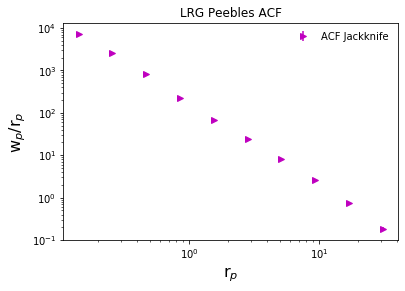

In [12]:
#plt.yscale("log", nonposy='clip')
plt.yscale("log")
#plt.xscale("log", nonposy='clip')
plt.xscale("log")
#plt.errorbar(rp_LRGboot,wp_p_LRGboot/rp_LRGboot,yerr=wp_p_err_LRGboot/rp_LRGboot,fmt='<',color='r',label='ACF Boostrap Error')
plt.errorbar(rp_LRGjack,wp_p_LRGjack/rp_LRGjack,yerr=wp_p_err_LRGjack/rp_LRGjack,fmt='>',color='m',label='ACF Jackknife')
#http://matplotlib.org/api/markers_api.html?highlight=marker
#plt.errorbar(rp,w_p_noradec,yerr=w_p_noradec,fmt='.',color='b')
#plt.errorbar(rp,wp_p15,yerr=wp_p1_err,fmt='.',color='g')
#plt.errorbar(rp,wp_p/rp,yerr=wp_p_err/rp,fmt='.')
plt.legend(frameon=False)
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel('w$_{p}$/r$_{p}$',fontsize=16)
plt.title('LRG Peebles ACF')

plt.savefig('plots/autocorrfunctLRG.pdf')

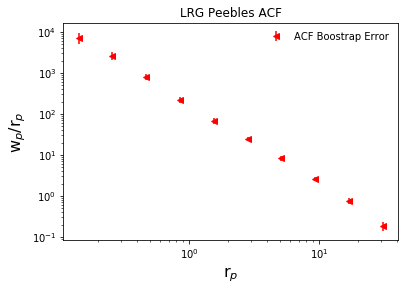

In [6]:
plt.yscale("log", nonposy='clip')
plt.xscale("log", nonposy='clip')
plt.errorbar(rp_LRGboot,wp_p_LRGboot/rp_LRGboot,yerr=wp_p_err_LRGboot/rp_LRGboot,fmt='<',color='r',label='ACF Boostrap Error')
#plt.errorbar(rp_LRGjack,wp_p_LRGjack/rp_LRGjack,yerr=wp_p_err_LRGjack/rp_LRGjack,fmt='>',color='m',label='ACF Jackknife')
#http://matplotlib.org/api/markers_api.html?highlight=marker
#plt.errorbar(rp,w_p_noradec,yerr=w_p_noradec,fmt='.',color='b')
#plt.errorbar(rp,wp_p15,yerr=wp_p1_err,fmt='.',color='g')
#plt.errorbar(rp,wp_p/rp,yerr=wp_p_err/rp,fmt='.')
plt.legend(frameon=False)
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel('w$_{p}$/r$_{p}$',fontsize=16)
plt.title('LRG Peebles ACF')

plt.savefig('../plots/autocorrfunctLRG.pdf')